<a href="https://colab.research.google.com/github/LinggarM/Movie-Synopsis-Text-Clustering/blob/main/pba_tugas_besar_movie_synopsis_text_clustering_8000_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Kelompok 5 :**

*   ## **Linggar Maretva Cendani**
*   ## **Fetty Krisnaeni**

# Import Dependencies

In [31]:
import sklearn 
sklearn.__version__

'0.22.2.post1'

In [4]:
import json
import requests
import os, shutil
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pickle
from google.colab import drive
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from wordcloud import WordCloud
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [5]:
path = "/content/gdrive/MyDrive/Upload/Akademik/Tugas Besar PBA"
path_api = "/content/gdrive/MyDrive/Upload/API/"

# Data Collecting

## Retrieve Genres

In [3]:
# Get All Genres

movie_api = open('%sapi_themoviedb.txt' % path_api, 'r').read()
genres = []
for i in range(200) :
  url = ("https://api.themoviedb.org/3/movie/%d?api_key=%s" % (i, movie_api))
  r = requests.get(url)
  json_data = json.loads(r.text)
  try:
    if (json_data['genres'] != "") :
      # print(json_data['genres'])
      for j in json_data['genres'] :
        genre = j.get('name')
        if (genre not in genres) :
          genres.append(genre)
  except Exception:
    pass
print(genres)

FileNotFoundError: ignored

In [ ]:
len(genres)

## Retrieve Titles & Synopsis

In [ ]:
titles = []
synopsis = []

for i in range(20000) :
  url = ("https://api.themoviedb.org/3/movie/%d?api_key=63fea4c709da1f1496b7a1ca7a3c6083" % i)
  r = requests.get(url)
  json_data = json.loads(r.text)
  try:
    if (json_data['overview'] != "" and json_data['overview'] != "No overview found." and json_data['original_language'] == 'en') :
      titles.append(json_data['title'])
      synopsis.append(json_data['overview'])
  except Exception:
    pass

In [ ]:
df_movies = pd.DataFrame({'title': titles, 'synopsis': synopsis})

In [ ]:
df_movies.head()

In [ ]:
df_movies.info()

In [ ]:
with open('%s/movie_synopsis.csv' % path, 'w') as f:
  df_movies.to_csv(f)

# Data Preprocessing

## Import Data

In [6]:
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [7]:
df_movies = pd.read_csv('%s/movie_synopsis_8000_no overview.csv' % path)
df_movies.head()

,title,synopsis
0,Four Rooms,It's Ted the Bellhop's first night on the job....
1,Judgment Night,"While racing to a boxing match, Frank, Mike, J..."
2,Life in Loops (A Megacities RMX),Timo Novotny labels his new project an experim...
3,Star Wars,Princess Leia is captured and held hostage by ...
4,Finding Nemo,"Nemo, an adventurous young clownfish, is unexp..."


In [8]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8457 entries, 0 to 8456
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     8457 non-null   object
 1   synopsis  8457 non-null   object
dtypes: object(2)
memory usage: 132.3+ KB


## Delete Missing Value

In [9]:
# Get names of indexes for which column synopsis has no overview
index_drop = df_movies[df_movies['synopsis'] == "No overview found."].index

# Delete these row indexes from dataFrame
df_movies.drop(index_drop , inplace=True)

# Reset the index
df_movies.reset_index(drop =True, inplace=True)

In [10]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8214 entries, 0 to 8213
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     8214 non-null   object
 1   synopsis  8214 non-null   object
dtypes: object(2)
memory usage: 128.5+ KB


## Case Folding

In [11]:
df_movies["synopsis"] = df_movies["synopsis"].str.lower()
df_movies.head()

,title,synopsis
0,Four Rooms,it's ted the bellhop's first night on the job....
1,Judgment Night,"while racing to a boxing match, frank, mike, j..."
2,Life in Loops (A Megacities RMX),timo novotny labels his new project an experim...
3,Star Wars,princess leia is captured and held hostage by ...
4,Finding Nemo,"nemo, an adventurous young clownfish, is unexp..."


## TF-IDF Training

In [12]:
vectorizer = TfidfVectorizer(stop_words='english')
features = vectorizer.fit_transform(df_movies['synopsis'].values) # training vector TF-IDF pada tiap data

# vector TF-IDF tiap kalimat (features), pasangan index kata dan nilainya
for i in features :
  print(i)
  print('-----------------------------')

Streaming output truncated to the last 5000 lines.
  (0, 12973)	0.14483275104625953
  (0, 13149)	0.13334586172540167
  (0, 24957)	0.13582667519419955
  (0, 19440)	0.15240864127004877
  (0, 22836)	0.1473720700967724
  (0, 13120)	0.17393621751782645
  (0, 8265)	0.1513027940750261
  (0, 8289)	0.11682112768112195
  (0, 25181)	0.13863052877378373
  (0, 9008)	0.13863052877378373
  (0, 24913)	0.12196110094053371
  (0, 3447)	0.1071559827980113
  (0, 26174)	0.11682112768112195
  (0, 9127)	0.12797983875545338
  (0, 18845)	0.11111454318249671
  (0, 5267)	0.13112128247827526
  (0, 10409)	0.09228187772399131
  (0, 3986)	0.13112128247827526
  (0, 15067)	0.10757735048365544
  (0, 27070)	0.07234665066262949
  (0, 9308)	0.08432181315756035
-----------------------------
  (0, 12857)	0.2131956414188282
  (0, 7006)	0.20392116623243212
  (0, 17420)	0.20392116623243212
  (0, 24874)	0.1814860013138223
  (0, 14253)	0.20392116623243212
  (0, 12384)	0.1845403543585994
  (0, 5709)	0.16710741411314206
  (0, 25391

In [13]:
# Save Model
pickle.dump(vectorizer, open('%s/vectorizer.sav'  % path, 'wb'))

In [14]:
# Load Model
vectorizer = pickle.load(open('%s/vectorizer.sav'  % path, 'rb'))

# KMeans Model

## KMeans Model Training

In [15]:
k = 14 # jumlah cluster

In [16]:
kmeans_model = KMeans(n_clusters = k)
synopsis_clusters = kmeans_model.fit(features)

In [17]:
# Save Model
pickle.dump(kmeans_model, open('%s/kmeans_model.sav' % path, 'wb'))

In [18]:
# Load Model
kmeans_model = pickle.load(open('%s/kmeans_model.sav'% path, 'rb'))

## Data Labelling

In [19]:
df_movies['label'] = kmeans_model.labels_
df_movies.head()

,title,synopsis,label
0,Four Rooms,it's ted the bellhop's first night on the job....,3
1,Judgment Night,"while racing to a boxing match, frank, mike, j...",2
2,Life in Loops (A Megacities RMX),timo novotny labels his new project an experim...,0
3,Star Wars,princess leia is captured and held hostage by ...,3
4,Finding Nemo,"nemo, an adventurous young clownfish, is unexp...",9


In [20]:
with open('%s/movie_synopsis_labeled.csv' % path, 'w') as f:
  df_movies.to_csv(f)

## Data Distribution

In [21]:
movie_clusters = df_movies.groupby('label')

clusters_count = []
for cluster in movie_clusters :
    clusters_count.append(len(cluster[1]))

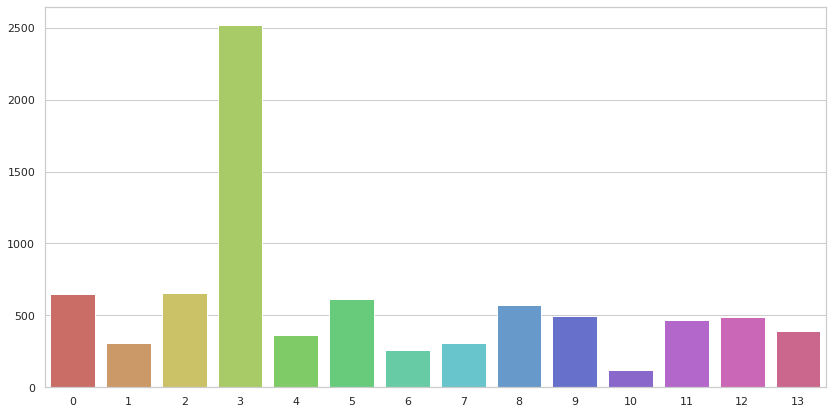

In [22]:
plt.figure(figsize=(14, 7))
sns.set_theme(style="whitegrid")
graph = sns.barplot(x = np.arange(k), y = clusters_count, palette='hls')

# Data from each Cluster

## Data Preview for each Cluster

In [23]:
clusters = df_movies.groupby('label')

for cluster in clusters.groups :
  print("Cluster %d : " % cluster)
  data_cluster = clusters.get_group(cluster)[['title','synopsis']]
  for i in range(5) :
    data = data_cluster.iloc[i]
    print('   ', data['title'], ': ', data['synopsis'])
  print('\n')

Cluster 0 : 
    Life in Loops (A Megacities RMX) :  timo novotny labels his new project an experimental music documentary film, in a remix of the celebrated film megacities (1997), a visually refined essay on the hidden faces of several world "megacities" by leading austrian documentarist michael glawogger. novotny complements 30 % of material taken straight from the film (and re-edited) with 70 % as yet unseen footage in which he blends original shots unused by glawogger with his own sequences (shot by megacities cameraman wolfgang thaler) from tokyo. alongside the japanese metropolis, life in loops takes us right into the atmosphere of mexico city, new york, moscow and bombay. this electrifying combination of fascinating film images and an equally compelling soundtrack from sofa surfers sets us off on a stunning audiovisual adventure across the continents. the film also makes an original contribution to the discussion on new trends in documentary filmmaking. written by karlovy vary 

## Save All Data from each Cluster

In [24]:
folder = ('%s/csv cluster' % path)
for filename in os.listdir(folder):
    file_path = os.path.join(folder, filename)
    try:
        if os.path.isfile(file_path) or os.path.islink(file_path):
            os.unlink(file_path)
        elif os.path.isdir(file_path):
            shutil.rmtree(file_path)
    except Exception as e:
        print('Failed to delete %s. Reason: %s' % (file_path, e))

In [25]:
clusters = df_movies.groupby('label')

for cluster in clusters.groups :
    f = open(('%s/csv cluster/cluster'  % path)+str(cluster)+ '.csv', 'w') # buat file csv untuk tiap cluster
    data = clusters.get_group(cluster)[['title','synopsis']] # judul dan sinposis tiap data pada tiap cluster
    f.write(data.to_csv(index_label='id')) # simpan ke csv
    f.close()

# Feature Names of each Cluster

In [26]:
order_centroids = kmeans_model.cluster_centers_.argsort()[:, ::-1] # diurutkan berdasarkan indeks -> lalu di-reversed
terms = vectorizer.get_feature_names()
n_terms = 10

feature_names = [[0 for x in range(n_terms)] for y in range(k)] 
for i in range(k) :
	print("Cluster %d :" % i)
	j_counter = 0
	for j in order_centroids [i, :n_terms] :
		print('   %s' % terms[j])
		feature_names[i][j_counter] = terms[j]
		j_counter += 1
	print('----------')

Cluster 0 :
   film
   documentary
   movie
   music
   band
   live
   comedy
   tour
   rock
   footage
----------
Cluster 1 :
   old
   year
   boy
   life
   new
   father
   girl
   family
   daughter
   12
----------
Cluster 2 :
   killer
   police
   murder
   agent
   detective
   serial
   crime
   cop
   case
   drug
----------
Cluster 3 :
   world
   story
   group
   time
   finds
   evil
   friends
   way
   help
   team
----------
Cluster 4 :
   new
   york
   city
   world
   life
   love
   young
   family
   man
   manager
----------
Cluster 5 :
   life
   man
   love
   story
   world
   family
   finds
   make
   new
   friends
----------
Cluster 6 :
   school
   high
   student
   students
   teacher
   friends
   girls
   new
   girl
   college
----------
Cluster 7 :
   town
   small
   sheriff
   local
   new
   way
   woman
   life
   comes
   murder
----------
Cluster 8 :
   love
   wife
   falls
   woman
   husband
   fall
   son
   daughter
   ex
   affair
---

In [27]:
with open('%s/feature_names.csv' % path, 'w') as f:
  pd.DataFrame(feature_names).to_csv(f)

Cluster: 0


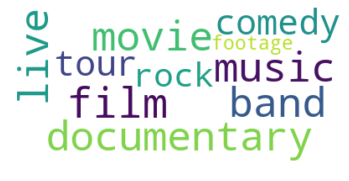

Cluster: 1


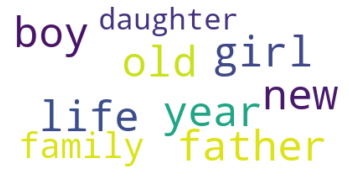

Cluster: 2


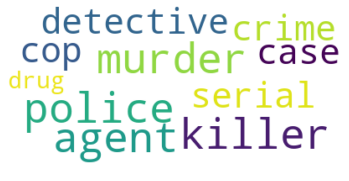

Cluster: 3


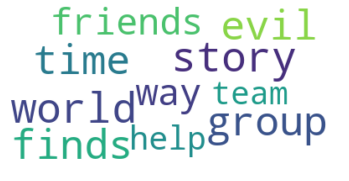

Cluster: 4


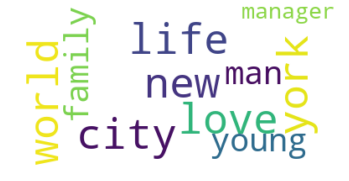

Cluster: 5


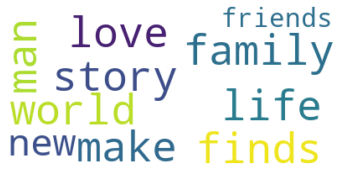

Cluster: 6


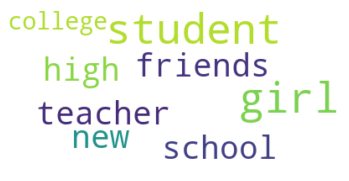

Cluster: 7


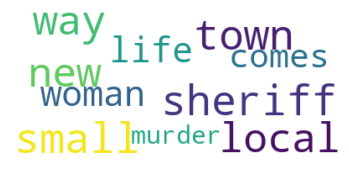

Cluster: 8


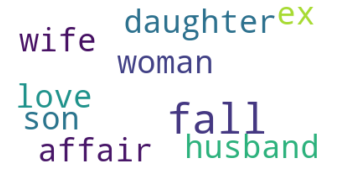

Cluster: 9


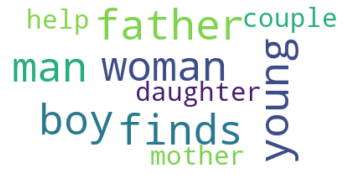

Cluster: 10


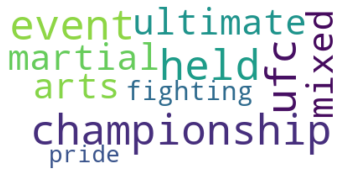

Cluster: 11


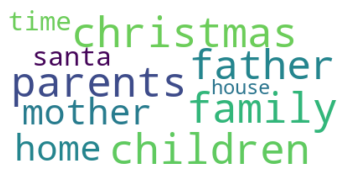

Cluster: 12


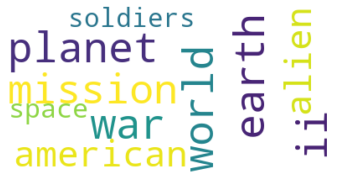

Cluster: 13


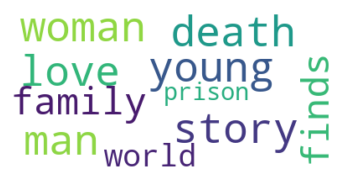

In [28]:
c = []
keywords = []
for i in range(k) :
  c.append(i)
  key = ""
  for j in order_centroids [i, :n_terms] :
    key = key+(" ")+(terms[j])
  keywords.append(key)

for i in range(k) :
  print('Cluster: %d' % c[i])
  text = keywords[i]
  wordcloud = WordCloud(max_font_size=50, background_color="white").generate(text)
  plt.figure()
  plt.imshow(wordcloud, interpolation="bilinear")
  plt.axis("off")
  plt.savefig('%s/wordcloud/wordcloud%d.jpg' % (path, i))
  plt.show()

# Cluster Prediction and Recommendation

In [29]:
def predict_cluster(sentence) :
  Y = vectorizer.transform([sentence])
  prediction = kmeans_model.predict(Y)
  cluster_prediction = prediction[0]
  print("Sentence           : ", sentence)
  print("Cluster predicted  : ", cluster_prediction)

def movie_recommendation(n, query, features, vectorizer, df_movies) :
  query = [query.lower()]
  query = vectorizer.transform(query)

  cosine_score = []
  index = 0
  for i in features :
    cosine_score.append(cosine_similarity(query, i))
    index +=1

  cosine_score_update = []
  for i in cosine_score :
    cosine_score_update.append(i[0][0])
  cosine_score_update = np.array(cosine_score_update)
  cosine_score_update
  indices = np.argsort(cosine_score_update)[::-1]

  for i in range(n) :
    index_now = indices[i]
    if (cosine_score_update[index_now] != 0) :
      print(i, " . ", df_movies['title'][index_now], " : ", cosine_score_update[index_now], " : ", df_movies['synopsis'][index_now])

def movie_recommendation_by_title(n, title, features, vectorizer, df_movies) :
  
  synopsis_ori = ""
  title_new = ""
  url = ("https://api.themoviedb.org/3/search/movie?api_key=63fea4c709da1f1496b7a1ca7a3c6083&language=en-US&query=%s&page=1&include_adult=false" % title)
  r = requests.get(url)
  json_data = json.loads(r.text)
  try:
    if (json_data['results'][0]['overview'] != "") :
      title_new = json_data['results'][0]['title']
      synopsis_ori = json_data['results'][0]['overview']
  except Exception:
    pass
  
  synopsis = [synopsis_ori.lower()]
  synopsis = vectorizer.transform(synopsis)

  cosine_score = []
  index = 0
  for i in features :
    cosine_score.append(cosine_similarity(synopsis, i))
    index +=1

  cosine_score_update = []
  for i in cosine_score :
    cosine_score_update.append(i[0][0])
  cosine_score_update = np.array(cosine_score_update)
  cosine_score_update
  indices = np.argsort(cosine_score_update)[::-1]

  print("Title Query : ", title)
  print(title_new, " : ", synopsis_ori, "\n")
  for i in range(n) :
    index_now = indices[i]
    if (cosine_score_update[index_now] != 0) :
      print(i, " . ", df_movies['title'][index_now], " : ", cosine_score_update[index_now], " : ", df_movies['synopsis'][index_now])

## Predict Sentences

In [ ]:
sentence = "Britain declared war on Germany in september 1939 and begin world war 2"

predict_cluster(sentence)

In [ ]:
sentence = "There are a lot of aliens at space"

predict_cluster(sentence)

In [ ]:
sentence = "Johnstone's Family is very nice family"

predict_cluster(sentence)

## Movie Recommendation (by Query/ Synopsis)

In [ ]:
n = 10
query = "Johnstone's Family is very nice family"

print("Synopsis : ", query, "\n")
movie_recommendation(n, query, features, vectorizer, df_movies)

## Movie Recommendation (by Title)

In [ ]:
n = 10
title = "Star Trek Beyond"

movie_recommendation_by_title(n, title, features, vectorizer, df_movies)

# Evaluation

## Elbow Method (SSE)

In [ ]:
SSE = []
K = range(3,30)
for n_k in K:
  kmeans_model_iteration = KMeans(n_clusters = n_k).fit(features)
  SSE.append(kmeans_model_iteration.inertia_)

In [ ]:
plt.plot(K, SSE, 'bx-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('The Elbow Method showing the optimal k')
plt.show()

## Silhouette Score

In [ ]:
# nilai silhouette score antara -1 dan 1, semakin tinggil semakin bagus
print(f'Silhouette Score : {silhouette_score(features, labels = kmeans_model.labels_)}')

# Data Visualization

## 2 Dimensi

### PCA Dimensionality Reduction

In [ ]:
pca = PCA(n_components = 2)
reduced_features = pca.fit_transform(features.toarray())
reduced_cluster_centers = pca.transform(synopsis_clusters.cluster_centers_)

In [ ]:
plt.figure(figsize=(30, 15), dpi=80)
plt.scatter(reduced_features[:, 0], reduced_features[:,1], c = kmeans_model.predict(features))
plt.scatter(reduced_cluster_centers[:, 0], reduced_cluster_centers[:,1], marker='x', s=150, c='b')

### t-SNE Dimensionality Reduction

In [ ]:
tsne = TSNE(n_components=2)
reduced_features_tsne = tsne.fit_transform(features.toarray())

In [ ]:
# Save Model
pickle.dump(tsne, open('%s/tsne.sav' % path, 'wb'))

In [ ]:
plt.figure(figsize=(30, 15), dpi=80)
plt.scatter(reduced_features_tsne[:, 0], reduced_features_tsne[:,1], c = kmeans_model.predict(features))

## 3 Dimensi

### PCA Dimensionality Reduction

In [ ]:
pca_3d = PCA(n_components = 3)
reduced_features_3d = pca_3d.fit_transform(features.toarray())
reduced_cluster_centers_3d = pca_3d.transform(synopsis_clusters.cluster_centers_)

In [ ]:
sns.set(style = "darkgrid")

fig = plt.figure(figsize=(30, 15), dpi=80)
ax = fig.add_subplot(111, projection = '3d')

x = reduced_features_3d[:, 0]
y = reduced_features_3d[:, 1]
z = reduced_features_3d[:, 2]

ax.scatter(x, y, z, c = synopsis_clusters.labels_)
ax.scatter(reduced_cluster_centers_3d[:, 0], reduced_cluster_centers_3d[:,1], reduced_cluster_centers_3d[:,2], marker='x', s=500, c='b')

plt.show()

### t-SNE Dimensionality Reduction

In [ ]:
tsne_3d = TSNE(n_components=3)
reduced_features_3d_tsne = tsne_3d.fit_transform(features.toarray())

In [ ]:
# Save Model
pickle.dump(tsne_3d, open('%s/tsne_3d.sav' % path, 'wb'))

In [ ]:
sns.set(style = "darkgrid")

fig = plt.figure(figsize=(30, 20), dpi=80)
ax = fig.add_subplot(111, projection = '3d')

x = reduced_features_3d_tsne[:, 0]
y = reduced_features_3d_tsne[:, 1]
z = reduced_features_3d_tsne[:, 2]

ax.scatter(x, y, z, c = synopsis_clusters.labels_)

plt.show()